<a href="https://colab.research.google.com/github/KarynaSam/Python-DS/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Кластеризація за допомогою K-means для двомірного масиву***

In [ ]:
data_file = '/content/drive/MyDrive/HW_6/data_2d.csv'
two_sizes = pd.read_csv(data_file, header=None)

In [ ]:
two_sizes.shape


(200, 3)

In [ ]:
two_sizes.head()


,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [ ]:
two_sizes.describe()


,0,1,2
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [ ]:
two_sizes.isna().sum()

0    0
1    0
2    0
dtype: int64

Зобразимо графічно оригінальні нетрансформовані дані

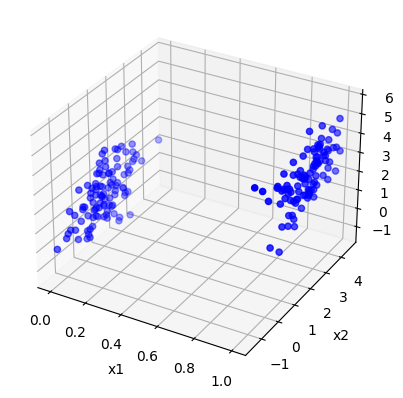

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = two_sizes[0]
x2 = two_sizes[1]
x3 = two_sizes[2]

ax.scatter(x1, x2, x3, c='b', marker='o')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

Згідно з графіком, навіть без подальшої кластерізації дані легко розділяються на дві групи. Згідно першій ознаці поділяються на 0 та 1

Проведемо нормалізацію

In [ ]:
scaled_data = StandardScaler().fit_transform(two_sizes)

In [ ]:
scaled_data.shape

(200, 3)

Дані після нармалізації

In [ ]:
X_norm = pd.DataFrame(scaled_data).describe()
X_norm

,0,1,2
count,200.000000,2.000000e+02,2.000000e+02
mean,0.000000,-1.065814e-16,-7.105427e-17
std,1.002509,1.002509e+00,1.002509e+00
min,-1.000000,-2.625806e+00,-2.220670e+00
25%,-1.000000,-7.150476e-01,-7.846139e-01
50%,0.000000,-2.355317e-02,4.458579e-02
75%,1.000000,7.620883e-01,8.685911e-01
max,1.000000,2.260294e+00,2.192492e+00


Ще одна візуалізація у 2Д просторі, для чього попередньо зменшуємо розмірність використовуючи алгоритм Principal Component Analysis (PCA)

In [ ]:
X_pca = PCA(n_components=2).fit_transform(scaled_data)
X_pca.shape

(200, 2)

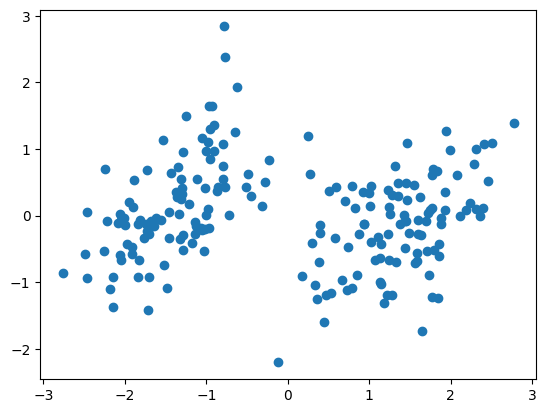

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])

На цьому графіку теж можна відокремити два основні кластери даних

Перевіряємо оптимальну кількість кластерів з використанням методу ліктя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

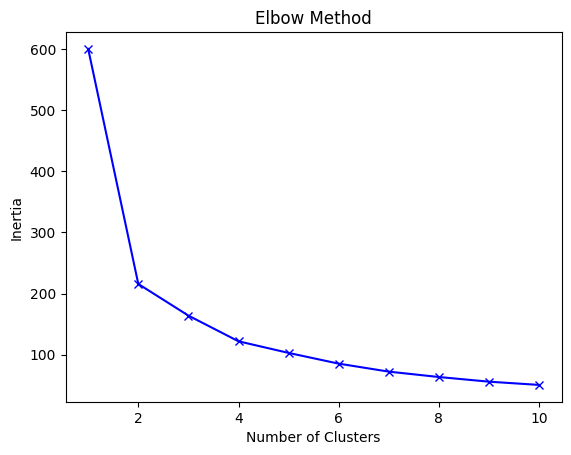

In [ ]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Найбільш виражений лікоть має 2, тобто найоптимальнішим буде кластерізація на дві групи

Перевіримо кластерізацію на 2 групи відомими алгоритмами кластерізації: KMeans, AgglomerativeClustering, DBSCAN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


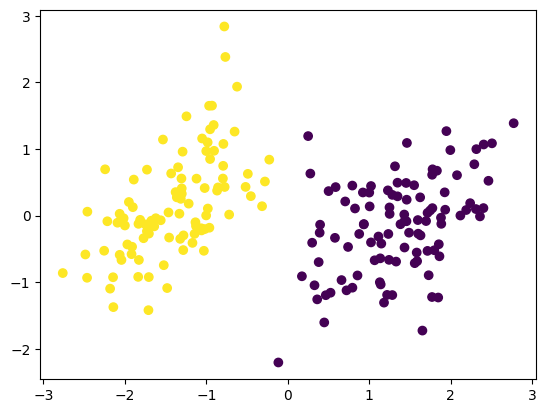

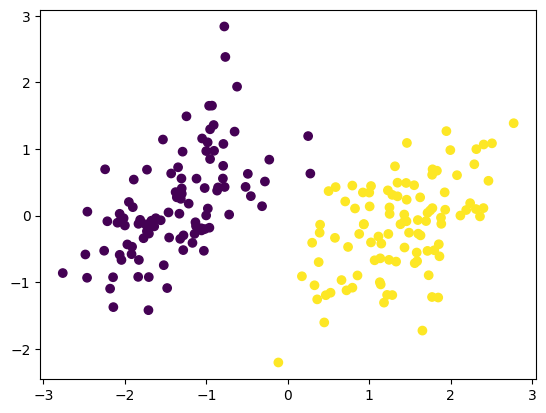

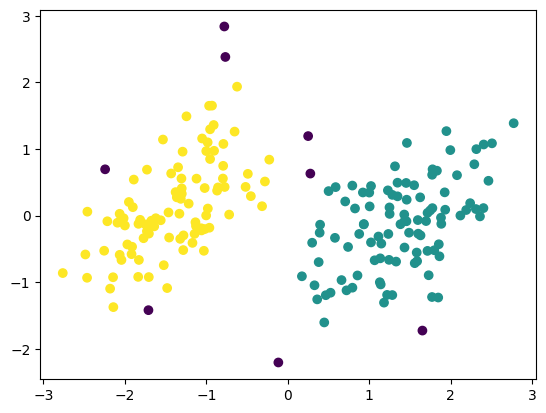

In [ ]:
kmeans = KMeans(n_clusters=2).fit(scaled_data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()

agg_cl = AgglomerativeClustering(n_clusters=2).fit(scaled_data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_cl.labels_)
plt.show()

dbscan_cl = DBSCAN(eps=0.5).fit(scaled_data)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_cl.labels_)
plt.show()

Висновок: дані добре кластеризуються саме на 2 групи, що підтвердити також за допомогою методу ліктя. Використавши алгоритми кластерізації sklearn: KMeans, AgglomerativeClustering, DBSCAN бачимо підтверждення теорії, кожен з алгоритмів підтверджує гіпотезу.

***Кластеризація за допомогою K-means для багатовимірного масиву***

In [ ]:
data_file = '/content/drive/MyDrive/HW_6/mnist.csv'
many_sizes = pd.read_csv(data_file, header=None)

In [ ]:
many_sizes.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
many_sizes.shape


(500, 785)

In [ ]:
many_sizes.dtypes


0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
780    int64
781    int64
782    int64
783    int64
784    int64
Length: 785, dtype: object

In [ ]:
many_sizes.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
many_sizes.isna().sum()


0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

Візуалізація даних неможлива, надані дані не мають пропусків, мають 500 екземплярів з 785 ознаками.

<Axes: >

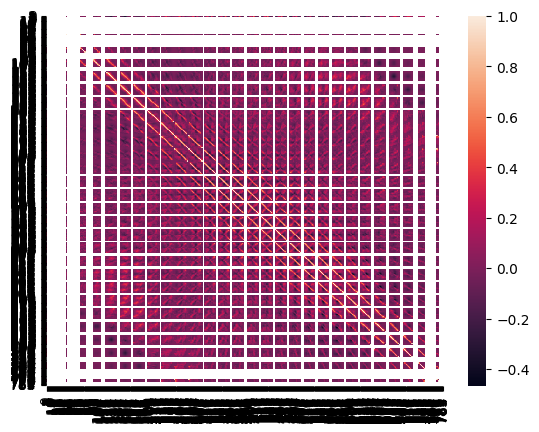

In [ ]:
corr = many_sizes.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Теплова карта кореляцій виглядає приблизно так, що не є репрезентаивним.

Нормалізуємо дані для подальшого використання для у алгоритмах кластерізації sklearn.

In [ ]:
scaled_mnist_data = StandardScaler().fit_transform(many_sizes)

In [ ]:
scaled_mnist_data.shape

(500, 785)

Передивимося дані після нормалізації

In [ ]:
X_norm_mnist = pd.DataFrame(scaled_mnist_data).describe()
X_norm_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,5.000000e+02,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,5.000000e+02,5.000000e+02,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,-2.131628e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.197442e-17,2.486900e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.001002e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.001002e+00,1.001002e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.524860e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.476615e-02,-4.476615e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-8.282590e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.476615e-02,-4.476615e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-1.316576e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.476615e-02,-4.476615e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.132443e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.476615e-02,-4.476615e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.609846e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.233831e+01,2.233831e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ще одна візуалізація у 2Д просторі, для чього попередньо зменшуємо розмірність використовуючи алгоритм Principal Component Analysis (PCA)

In [ ]:
X_pca_mnist = PCA(n_components=2).fit_transform(scaled_mnist_data)

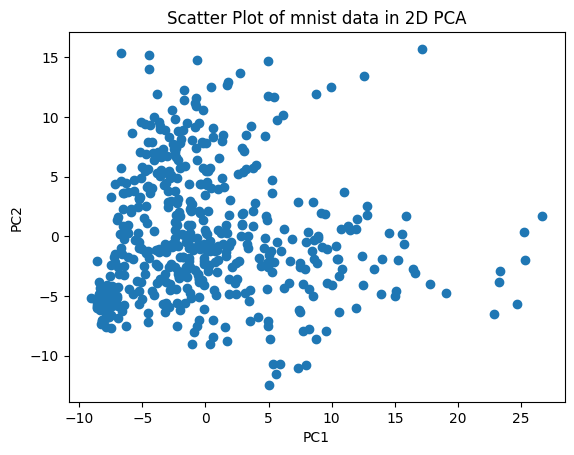

In [ ]:
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of mnist data in 2D PCA')
plt.show()

Візуально кластеризувати дані поки не видається можливим

Перевіримо данні за допомогою методу ліктя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

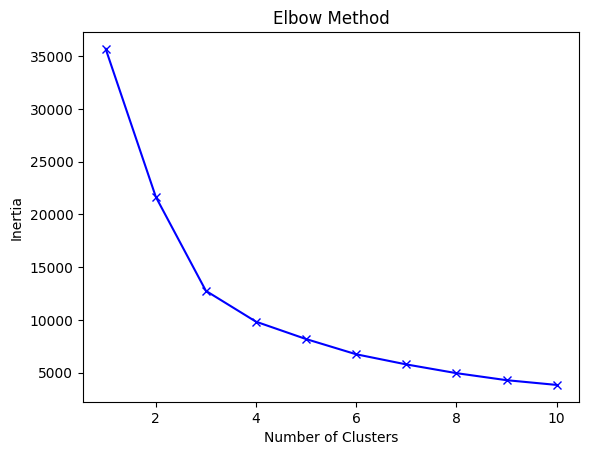

In [ ]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_mnist)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Найбільш виражений лікоть має в точці 3, тобто кластеризація на 3 групи буде оптимальною.

Перевіримо кластерізацію на 3 групи відомими алгоритмами кластерізації: KMeans, AgglomerativeClustering, DBSCAN.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


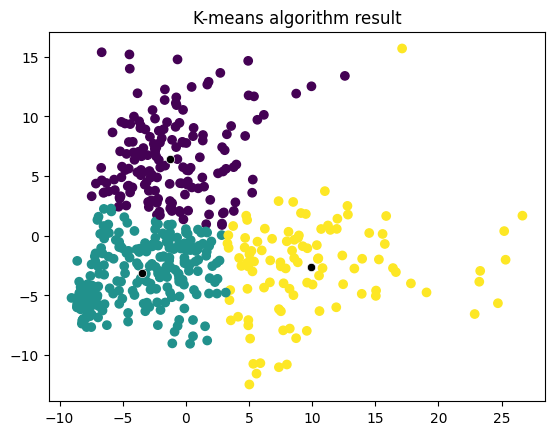

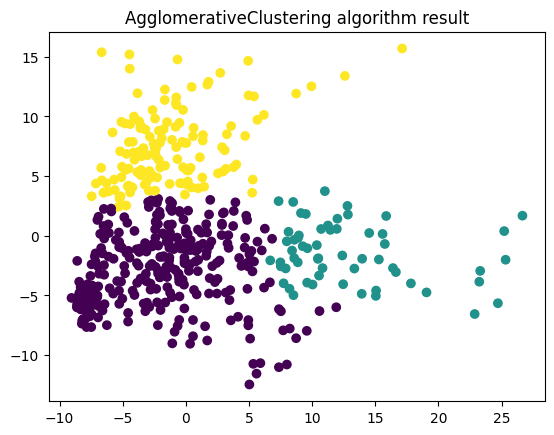

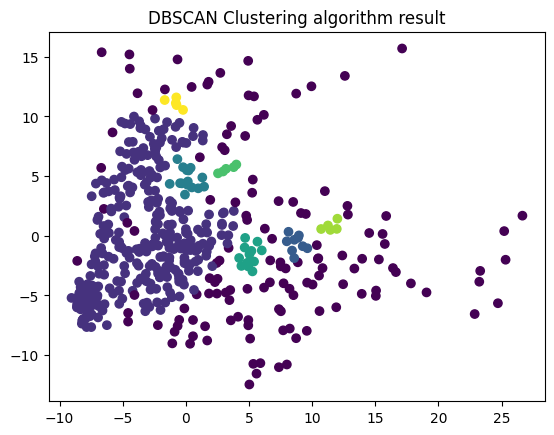

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X_pca_mnist)
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=kmeans.labels_)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])
plt.title('K-means algorithm result')
plt.show()

agg_cl = AgglomerativeClustering(n_clusters=3).fit(X_pca_mnist)
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=agg_cl.labels_)
plt.title('AgglomerativeClustering algorithm result')
plt.show()

dbscan_cl = DBSCAN(eps=1).fit(X_pca_mnist) #DBSCAN(eps=2, leaf_size=100) #DBSCAN(eps=2) #DBSCAN(eps=2, min_samples=10) #DBSCAN(eps=2, algorithm='kd_tree')
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=dbscan_cl.labels_)
plt.title('DBSCAN Clustering algorithm result')
plt.show()

Висновок: дані, надані у другому файлі кластерізуються на три групи. Візуалізація сирих даних з поточним рівнем знань дуже проблематична та не надає жодної користі. Підбір кількості кластерів методом ліктя надає оптимальним параметром 3 кластери. Використавши алгоритми кластерізації sklearn: KMeans, AgglomerativeClustering, DBSCAN бачимо що перші 2 алгоритми підтверджують гіпотезу, але з різними центрами кластерів, останній навіть при тюнингу гіперпараметрів не дає схожої кластерізації цього датасету.